# Repasse cambial

## Dados

In [1]:
import pandas as pd
import numpy as np
import statsmodels as st
from dateutil.relativedelta import relativedelta
import datetime

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('dadosiccsv.csv', sep = ';')

In [4]:
inicio_date = datetime.date(1999, 1, 1)
fim_date = datetime.date(2021, 12, 1)
delta = relativedelta(months=1)
datas = []
while (inicio_date <= fim_date):
    datas.append(inicio_date)
    inicio_date += delta
for registro in range(len(df)):
    df.loc[registro, 'datetime'] = datas[registro]

In [5]:
df = df.set_index('datetime')
df1 = df.drop(columns=['Data'])

In [6]:
df1

,Exp,Imp,PIB Mensal,Coeficiente de abertura,IPCA,IPCA alimentos (var),Petróleo,Taxa de câmbio
datetime,,,,,,,,
1999-01-01,2947694137,3746185100,46251000000,"0,144729395","1.468,41","0,9",12.52,"1,9824"
1999-02-01,3264023488,3235867059,45384000000,"0,143219869","1.483,83","2,71",12.01,"2,064"
1999-03-01,3825933128,4134496194,50079000000,"0,158957434","1.500,15","2,01",14.68,"1,7212"
1999-04-01,3701836009,3757415685,49165000000,"0,151718737","1.508,55","-0,23",17.31,"1,6599"
1999-05-01,4382344317,4171970713,49563000000,"0,172594779","1.513,08","-0,95",17.72,"1,7232"
...,...,...,...,...,...,...,...,...
2021-08-01,27216375900,19557276638,"1,40783E+11","0,332239351","5.876,05","1,39",67.70,"5,1427"
2021-09-01,24376129510,19975447581,"1,38846E+11","0,319429995","5.944,21","1,02",71.65,"5,4388"
2021-10-01,22602637234,20538918428,"1,34454E+11","0,320864799","6.018,51","1,17",81.48,"5,6424"


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 1999-01-01 to 2021-12-01
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Exp                      276 non-null    int64  
 1   Imp                      276 non-null    int64  
 2   PIB Mensal               276 non-null    object 
 3   Coeficiente de abertura  276 non-null    object 
 4   IPCA                     276 non-null    object 
 5   IPCA alimentos (var)     276 non-null    object 
 6   Petróleo                 276 non-null    float64
 7   Taxa de câmbio           276 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 19.4+ KB


In [8]:
df1.columns

Index(['Exp', 'Imp', 'PIB Mensal', 'Coeficiente de abertura', 'IPCA',
       'IPCA alimentos (var)', 'Petróleo', 'Taxa de câmbio'],
      dtype='object')

In [9]:
df1['PIB Mensal'] = df1['PIB Mensal'].str.replace(',', '.').astype(float)
df1['Coeficiente de abertura'] = df1['Coeficiente de abertura'].str.replace(',', '.').astype(float)
df1['Taxa de câmbio'] = df1['Taxa de câmbio'].str.replace(',', '.').astype(float)
df1['IPCA alimentos (var)'] = df1['IPCA alimentos (var)'].str.replace(',', '.').astype(float)
df1['IPCA'] = df1['IPCA'].str.replace('.', '').replace(',', '.')
df1['IPCA'] = df1['IPCA'].str.replace(',', '.').astype(float)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 1999-01-01 to 2021-12-01
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Exp                      276 non-null    int64  
 1   Imp                      276 non-null    int64  
 2   PIB Mensal               276 non-null    float64
 3   Coeficiente de abertura  276 non-null    float64
 4   IPCA                     276 non-null    float64
 5   IPCA alimentos (var)     276 non-null    float64
 6   Petróleo                 276 non-null    float64
 7   Taxa de câmbio           276 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 19.4+ KB


In [11]:
import scipy.stats
from statsmodels.tsa.stattools import adfuller

### Série em log natural

In [12]:
df_log = pd.DataFrame()

In [13]:
for col in df1.columns:
    df_log[col] = np.log(df1[col])

In [14]:
df_log = df_log.rename(columns = {'Exp': 'Exp log', 'Imp': 'Imp log', 'PIB Mensal': 'PIB Mensal log', 'Coeficiente de abertura': 'Coef abertura log', 'IPCA': 'IPCA log', 'IPCA alimentos (var)': 'IPCA alimentos (var) log', 'Petróleo': 'Petróleo log', 'Taxa de câmbio': 'Taxa de câmbio log'})

In [15]:
df_log

,Exp log,Imp log,PIB Mensal log,Coef abertura log,IPCA log,IPCA alimentos (var) log,Petróleo log,Taxa de câmbio log
datetime,,,,,,,,
1999-01-01,21.804289,22.044004,24.557349,-1.932890,7.291935,-0.105361,2.527327,0.684308
1999-02-01,21.906226,21.897563,24.538425,-1.943374,7.302382,0.996949,2.485740,0.724646
1999-03-01,22.065068,22.142631,24.636868,-1.839119,7.313320,0.698135,2.686486,0.543022
1999-04-01,22.032095,22.046997,24.618448,-1.885727,7.318904,NaN,2.851284,0.506757
1999-05-01,22.200850,22.151654,24.626510,-1.756809,7.321903,NaN,2.874694,0.544183
...,...,...,...,...,...,...,...,...
2021-08-01,24.027085,23.696613,25.670486,-1.101900,8.678640,0.329304,4.215086,1.637578
2021-09-01,23.916870,23.717770,25.656631,-1.141217,8.690173,0.019803,4.271793,1.693558
2021-10-01,23.841332,23.745587,25.624488,-1.136735,8.702595,0.157004,4.400358,1.730310


In [16]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 1999-01-01 to 2021-12-01
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Exp log                   276 non-null    float64
 1   Imp log                   276 non-null    float64
 2   PIB Mensal log            276 non-null    float64
 3   Coef abertura log         276 non-null    float64
 4   IPCA log                  276 non-null    float64
 5   IPCA alimentos (var) log  213 non-null    float64
 6   Petróleo log              276 non-null    float64
 7   Taxa de câmbio log        276 non-null    float64
dtypes: float64(8)
memory usage: 19.4+ KB


### Variação IPCA

In [17]:
df_log['variação IPCA (%)'] = df_log['IPCA log'].diff() * 100

In [18]:
df_log

,Exp log,Imp log,PIB Mensal log,Coef abertura log,IPCA log,IPCA alimentos (var) log,Petróleo log,Taxa de câmbio log,variação IPCA (%)
datetime,,,,,,,,,
1999-01-01,21.804289,22.044004,24.557349,-1.932890,7.291935,-0.105361,2.527327,0.684308,NaN
1999-02-01,21.906226,21.897563,24.538425,-1.943374,7.302382,0.996949,2.485740,0.724646,1.044640
1999-03-01,22.065068,22.142631,24.636868,-1.839119,7.313320,0.698135,2.686486,0.543022,1.093852
1999-04-01,22.032095,22.046997,24.618448,-1.885727,7.318904,NaN,2.851284,0.506757,0.558382
1999-05-01,22.200850,22.151654,24.626510,-1.756809,7.321903,NaN,2.874694,0.544183,0.299838
...,...,...,...,...,...,...,...,...,...
2021-08-01,24.027085,23.696613,25.670486,-1.101900,8.678640,0.329304,4.215086,1.637578,0.866225
2021-09-01,23.916870,23.717770,25.656631,-1.141217,8.690173,0.019803,4.271793,1.693558,1.153287
2021-10-01,23.841332,23.745587,25.624488,-1.136735,8.702595,0.157004,4.400358,1.730310,1.242208


### DataFrame final

In [19]:
df_fin = pd.DataFrame()

In [20]:
df_fin['Coef abertura log'] = df_log['Coef abertura log']

In [21]:
df_fin['PIB Mensal log'] = df_log['PIB Mensal log']
df_fin['IPCA log'] = df_log['IPCA log']
df_fin['IPCA alimentos (%)'] = df1['IPCA alimentos (var)']
df_fin['Petróleo log'] = df_log['Petróleo log']
df_fin['Taxa de câmbio log'] = df_log['Taxa de câmbio log']
df_fin['variação IPCA (%)'] = df_log['variação IPCA (%)']

In [22]:
df_fin = df_fin.dropna()

In [23]:
df_fin

,Coef abertura log,PIB Mensal log,IPCA log,IPCA alimentos (%),Petróleo log,Taxa de câmbio log,variação IPCA (%)
datetime,,,,,,,
1999-02-01,-1.943374,24.538425,7.302382,2.71,2.485740,0.724646,1.044640
1999-03-01,-1.839119,24.636868,7.313320,2.01,2.686486,0.543022,1.093852
1999-04-01,-1.885727,24.618448,7.318904,-0.23,2.851284,0.506757,0.558382
1999-05-01,-1.756809,24.626510,7.321903,-0.95,2.874694,0.544183,0.299838
1999-06-01,-1.727859,24.631542,7.323798,-1.28,2.885917,0.570245,0.189500
...,...,...,...,...,...,...,...
2021-08-01,-1.101900,25.670486,8.678640,1.39,4.215086,1.637578,0.866225
2021-09-01,-1.141217,25.656631,8.690173,1.02,4.271793,1.693558,1.153287
2021-10-01,-1.136735,25.624488,8.702595,1.17,4.400358,1.730310,1.242208


### Gráficos

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

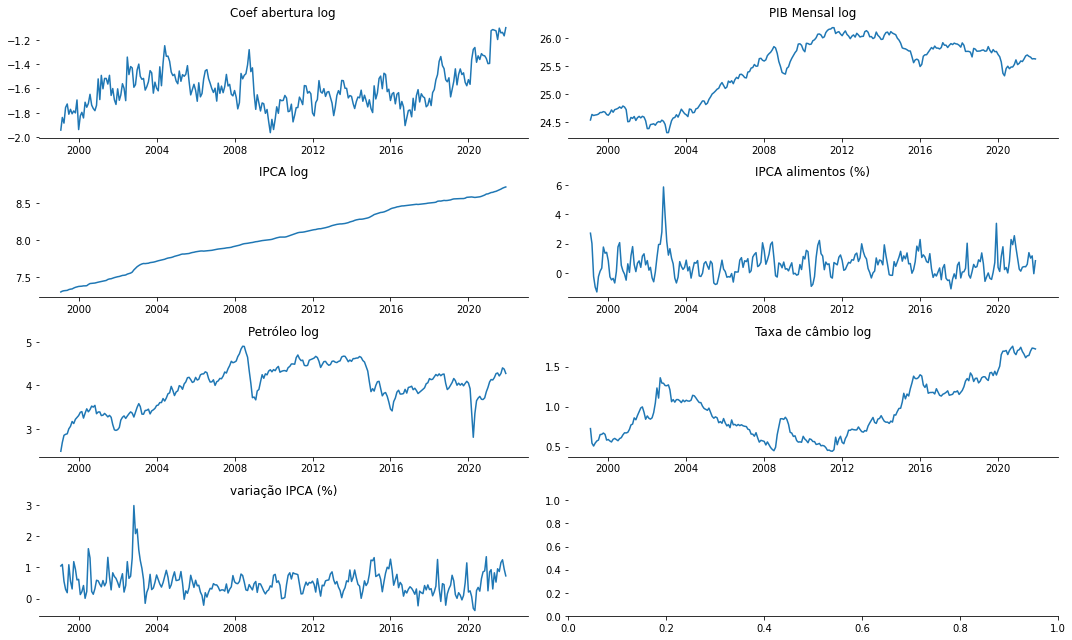

In [25]:
fig, axes = plt.subplots(4, 2, figsize = (15, 9))
axes[0,0].plot(df_fin['Coef abertura log'])
axes[0, 0].set_title('Coef abertura log')
axes[0,1].plot(df_fin['PIB Mensal log'])
axes[0, 1].set_title('PIB Mensal log')
axes[1,0].plot(df_fin['IPCA log'])
axes[1, 0].set_title('IPCA log')
axes[1,1].plot(df_fin['IPCA alimentos (%)'])
axes[1,1].set_title('IPCA alimentos (%)')
axes[2,0].plot(df_fin['Petróleo log'])
axes[2,0].set_title('Petróleo log')
axes[2,1].plot(df_fin['Taxa de câmbio log'])
axes[2,1].set_title('Taxa de câmbio log')
axes[3,0].plot(df_fin['variação IPCA (%)'])
axes[3,0].set_title('variação IPCA (%)')
sns.despine(left=True)
fig.tight_layout()
plt.show()

### Teste de estacionariedade ADF

Hipótese nula: tem raiz unitária (não estacionariedade)

In [26]:
colunas = df_fin.columns.tolist()

In [27]:
pvaloresadf = []
for i in range(len(colunas)):
    pvaloresadf.append(adfuller(df_fin[colunas[i]], regression='c',)[1])

In [28]:
adf_tuples = list(zip(colunas, pvaloresadf))
adfullerteste = pd.DataFrame(adf_tuples, columns=['Série', 'p-valor'])

In [29]:
for i in range(len(adfullerteste['p-valor'])):
    if adfullerteste.loc[i, 'p-valor']>0.05:
        adfullerteste.loc[i, 'resultado'] = 'aceita-se H0 a 5%'
    else: 
        adfullerteste.loc[i, 'resultado'] = 'rejeita-se'

In [30]:
adfullerteste = adfullerteste.set_index('Série')

In [31]:
adfullerteste.iloc[6,0] = adfuller(df1['Petróleo'], regression = 'ct')[1]

In [32]:
if adfullerteste.iloc[6,0] > 0.05:
    adfullerteste.iloc[6, 1] = 'aceita-se H0 a 5%'
else: 
    adfullerteste.iloc[6, 1] = 'rejeita-se'

In [33]:
adfullerteste

,p-valor,resultado
Série,,
Coef abertura log,6.779437e-01,aceita-se H0 a 5%
PIB Mensal log,5.641709e-01,aceita-se H0 a 5%
IPCA log,8.356944e-01,aceita-se H0 a 5%
IPCA alimentos (%),9.051865e-14,rejeita-se
Petróleo log,6.296296e-02,aceita-se H0 a 5%
Taxa de câmbio log,8.273479e-01,aceita-se H0 a 5%
variação IPCA (%),1.453897e-01,aceita-se H0 a 5%


### Teste KPSS de estacionariedade

Hipótese nula: estacionariedade

In [34]:
from statsmodels.tsa.stattools import kpss

In [35]:
pvaloreskpss = []
for i in range(len(colunas)):
    pvaloreskpss.append(kpss(df_fin[colunas[i]])[1])
    
kpss_tuples = list(zip(colunas, pvaloreskpss))
kpssteste = pd.DataFrame(kpss_tuples, columns=['Série', 'p-valor'])

for i in range(len(kpssteste['p-valor'])):
    if kpssteste.loc[i, 'p-valor']>0.05:
        kpssteste.loc[i, 'resultado'] = 'aceita-se H0 a 5%'
    else: 
        kpssteste.loc[i, 'resultado'] = 'rejeita-se'

C:\Users\anafe\Anaconda3\envs\PyR\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\anafe\Anaconda3\envs\PyR\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\anafe\Anaconda3\envs\PyR\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\anafe\Anaconda3\envs\PyR\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-u

In [36]:
kpssteste = kpssteste.set_index('Série')

In [37]:
kpssteste.iloc[6,0] = kpss(df1['Petróleo'], regression = 'ct')[1]

C:\Users\anafe\Anaconda3\envs\PyR\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [38]:
if kpssteste.iloc[6,0] > 0.05:
    kpssteste.iloc[6, 1] = 'aceita-se H0 a 5%'
else: 
    kpssteste.iloc[6, 1] = 'rejeita-se'

In [39]:
kpssteste

,p-valor,resultado
Série,,
Coef abertura log,0.061154,aceita-se H0 a 5%
PIB Mensal log,0.010000,rejeita-se
IPCA log,0.010000,rejeita-se
IPCA alimentos (%),0.100000,aceita-se H0 a 5%
Petróleo log,0.010000,rejeita-se
Taxa de câmbio log,0.010000,rejeita-se
variação IPCA (%),0.010000,rejeita-se


### Gráfico das séries

In [40]:
df1.columns

Index(['Exp', 'Imp', 'PIB Mensal', 'Coeficiente de abertura', 'IPCA',
       'IPCA alimentos (var)', 'Petróleo', 'Taxa de câmbio'],
      dtype='object')

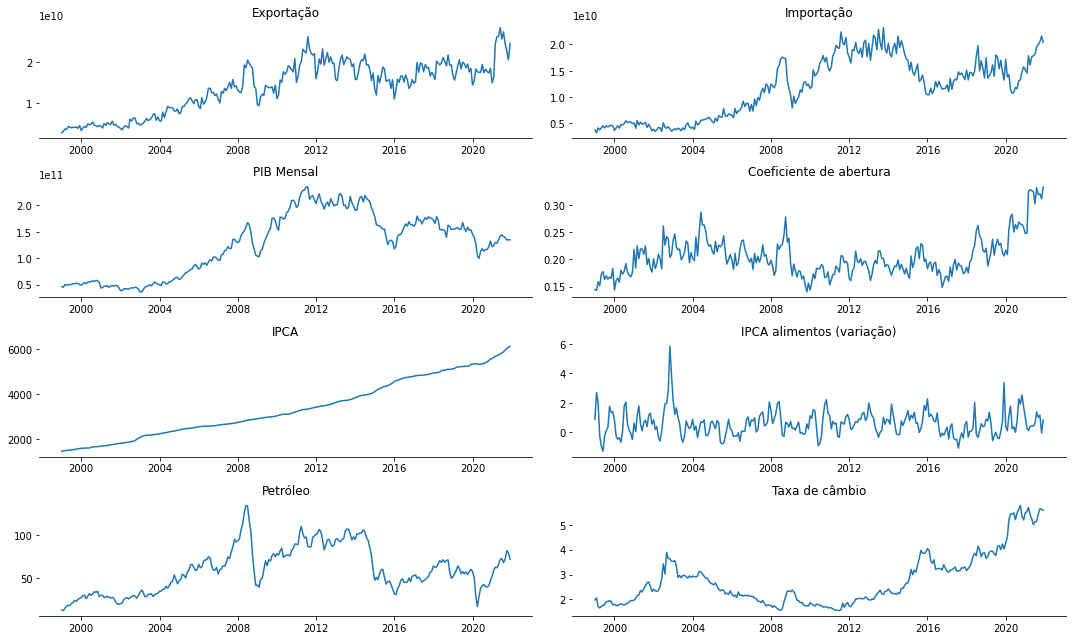

In [41]:
fig, axes = plt.subplots(4, 2, figsize = (15, 9))
axes[0,0].plot(df1['Exp'])
axes[0, 0].set_title("Exportação")
axes[0,1].plot(df1['Imp'])
axes[0, 1].set_title("Importação")
axes[1,0].plot(df1['PIB Mensal'])
axes[1, 0].set_title("PIB Mensal")
axes[1,1].plot(df1['Coeficiente de abertura'])
axes[1,1].set_title('Coeficiente de abertura')
axes[2,0].plot(df1['IPCA'])
axes[2,0].set_title('IPCA')
axes[2,1].plot(df1['IPCA alimentos (var)'])
axes[2,1].set_title('IPCA alimentos (variação)')
axes[3,0].plot(df1['Petróleo'])
axes[3,0].set_title('Petróleo')
axes[3,1].plot(df1['Taxa de câmbio'])
axes[3,1].set_title('Taxa de câmbio')
sns.despine(left=True)
fig.tight_layout()
plt.show()

### Diferenciação das séries

In [42]:
colunas

['Coef abertura log',
 'PIB Mensal log',
 'IPCA log',
 'IPCA alimentos (%)',
 'Petróleo log',
 'Taxa de câmbio log',
 'variação IPCA (%)']

In [43]:
#removendo coef e ipca alimentos e pib mensal
colunas.remove('Coef abertura log')
colunas.remove('IPCA alimentos (%)')
colunas.remove('PIB Mensal log')

In [44]:
colunas

['IPCA log', 'Petróleo log', 'Taxa de câmbio log', 'variação IPCA (%)']

In [45]:
df_diff = pd.DataFrame()
for col in colunas:
    df_diff[col] = df_fin[col].diff()

In [46]:
df_diff = df_diff.dropna()

In [47]:
df_diff['Coef abertura log'] = df_fin['Coef abertura log']
df_diff['IPCA alimentos (%)'] = df_fin['IPCA alimentos (%)']
df_diff['PIB Mensal log'] = df_fin['PIB Mensal log']

In [48]:
df_diff = df_diff.rename(columns = {'IPCA log': 'IPCA log diff', 'Petróleo log': 'Petróleo log diff', 'Taxa de câmbio log': 'Taxa de câmbo log diff', 'variação IPCA (%)': 'variação IPCA (%) diff'})

In [49]:
df_diff

,IPCA log diff,Petróleo log diff,Taxa de câmbo log diff,variação IPCA (%) diff,Coef abertura log,IPCA alimentos (%),PIB Mensal log
datetime,,,,,,,
1999-03-01,0.010939,0.200746,-0.181624,0.049212,-1.839119,2.01,24.636868
1999-04-01,0.005584,0.164798,-0.036264,-0.535470,-1.885727,-0.23,24.618448
1999-05-01,0.002998,0.023410,0.037426,-0.258544,-1.756809,-0.95,24.626510
1999-06-01,0.001895,0.011223,0.026062,-0.110339,-1.727859,-1.28,24.631542
1999-07-01,0.010839,0.114802,0.011077,0.894351,-1.812531,-0.24,24.643257
...,...,...,...,...,...,...,...
2021-08-01,0.008662,-0.068362,0.004229,-0.089165,-1.101900,1.39,25.670486
2021-09-01,0.011533,0.056707,0.055980,0.287062,-1.141217,1.02,25.656631
2021-10-01,0.012422,0.128564,0.036751,0.088921,-1.136735,1.17,25.624488


In [50]:
import statsmodels.api as sm

In [51]:
hp_filter = sm.tsa.filters.hpfilter(df_fin[['PIB Mensal log']], 129600)

In [52]:
dfhp_filter = pd.DataFrame(hp_filter)

In [53]:
dfhp_filter = dfhp_filter.transpose()

In [54]:
dfhp_filter

,cycle,trend
datetime,,
1999-02-01,-0.063337,24.601762
1999-03-01,0.036466,24.600402
1999-04-01,0.019407,24.599040
1999-05-01,0.028832,24.597678
1999-06-01,0.035226,24.596316
...,...,...
2021-08-01,0.093925,25.576561
2021-09-01,0.084456,25.572175
2021-10-01,0.056696,25.567792


In [55]:
dfhp_filter.drop(dfhp_filter.index[0], inplace = True)

In [56]:
dfhp_filter = dfhp_filter.rename(columns = {'cycle': 'ciclo hp PIB', 'trend': 'tendência hp PIB'})

In [57]:
dfhp_filter

,ciclo hp PIB,tendência hp PIB
datetime,,
1999-03-01,0.036466,24.600402
1999-04-01,0.019407,24.599040
1999-05-01,0.028832,24.597678
1999-06-01,0.035226,24.596316
1999-07-01,0.048305,24.594952
...,...,...
2021-08-01,0.093925,25.576561
2021-09-01,0.084456,25.572175
2021-10-01,0.056696,25.567792


In [58]:
df_diff['ciclo hp PIB'] = dfhp_filter['ciclo hp PIB']
df_diff['tendência hp PIB'] = dfhp_filter['tendência hp PIB']

In [59]:
df_diff

,IPCA log diff,Petróleo log diff,Taxa de câmbo log diff,variação IPCA (%) diff,Coef abertura log,IPCA alimentos (%),PIB Mensal log,ciclo hp PIB,tendência hp PIB
datetime,,,,,,,,,
1999-03-01,0.010939,0.200746,-0.181624,0.049212,-1.839119,2.01,24.636868,0.036466,24.600402
1999-04-01,0.005584,0.164798,-0.036264,-0.535470,-1.885727,-0.23,24.618448,0.019407,24.599040
1999-05-01,0.002998,0.023410,0.037426,-0.258544,-1.756809,-0.95,24.626510,0.028832,24.597678
1999-06-01,0.001895,0.011223,0.026062,-0.110339,-1.727859,-1.28,24.631542,0.035226,24.596316
1999-07-01,0.010839,0.114802,0.011077,0.894351,-1.812531,-0.24,24.643257,0.048305,24.594952
...,...,...,...,...,...,...,...,...,...
2021-08-01,0.008662,-0.068362,0.004229,-0.089165,-1.101900,1.39,25.670486,0.093925,25.576561
2021-09-01,0.011533,0.056707,0.055980,0.287062,-1.141217,1.02,25.656631,0.084456,25.572175
2021-10-01,0.012422,0.128564,0.036751,0.088921,-1.136735,1.17,25.624488,0.056696,25.567792


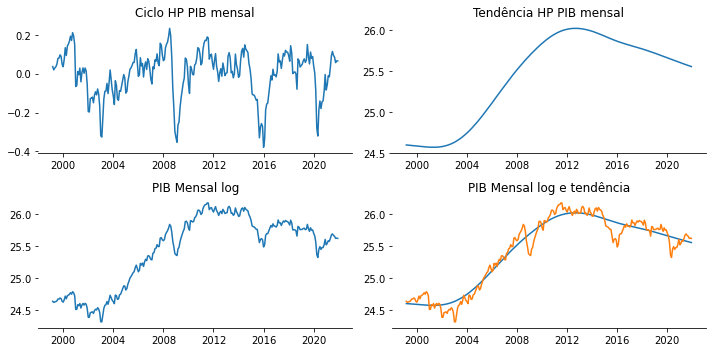

In [60]:
fig, ax = plt.subplots(2,2, figsize = (10,5))
ax[0,0].plot(df_diff['ciclo hp PIB'])
ax[0,0].set_title('Ciclo HP PIB mensal')
ax[0,1].plot(df_diff['tendência hp PIB'])
ax[0,1].set_title('Tendência HP PIB mensal')
ax[1,0].plot(df_diff['PIB Mensal log'])
ax[1,0].set_title('PIB Mensal log')
ax[1,1].plot(df_diff[['tendência hp PIB', 'PIB Mensal log']])
ax[1,1].set_title('PIB Mensal log e tendência')
sns.despine(left=True)
fig.tight_layout()
plt.show()

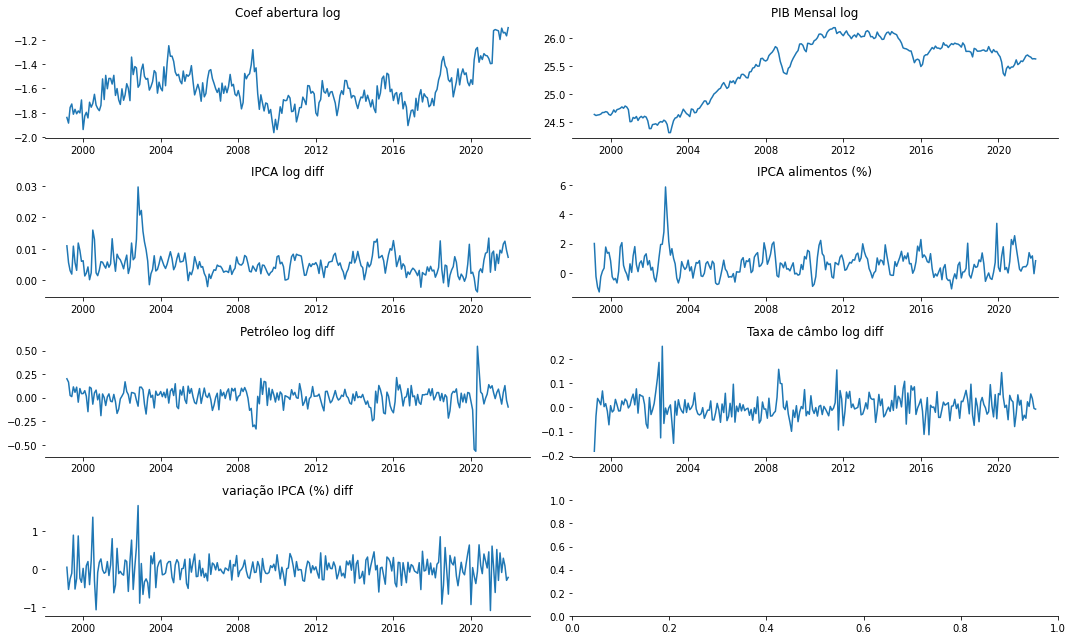

In [61]:
fig, axes = plt.subplots(4, 2, figsize = (15, 9))
axes[0,0].plot(df_diff['Coef abertura log'])
axes[0, 0].set_title('Coef abertura log')
axes[0,1].plot(df_diff['PIB Mensal log'])
axes[0, 1].set_title('PIB Mensal log')
axes[1,0].plot(df_diff['IPCA log diff'])
axes[1, 0].set_title('IPCA log diff')
axes[1,1].plot(df_diff['IPCA alimentos (%)'])
axes[1,1].set_title('IPCA alimentos (%)')
axes[2,0].plot(df_diff['Petróleo log diff'])
axes[2,0].set_title('Petróleo log diff')
axes[2,1].plot(df_diff['Taxa de câmbo log diff'])
axes[2,1].set_title('Taxa de câmbo log diff')
axes[3,0].plot(df_diff['variação IPCA (%) diff'])
axes[3,0].set_title('variação IPCA (%) diff')
sns.despine(left=True)
fig.tight_layout()
plt.show()

### KPSS para as diferenças

In [62]:
colunas2 = df_diff.columns.tolist()

In [63]:
#removendo PIB mensal log, IPCA alimentos ($), Coef de abertura log
colunas2.remove('PIB Mensal log')
colunas2.remove('IPCA alimentos (%)')
colunas2.remove('Coef abertura log')

In [64]:
colunas2.remove('ciclo hp PIB')
colunas2.remove('tendência hp PIB')

In [65]:
colunas2

['IPCA log diff',
 'Petróleo log diff',
 'Taxa de câmbo log diff',
 'variação IPCA (%) diff']

In [66]:
pvaloreskpss2 = []
for i in range(len(colunas2)):
    pvaloreskpss2.append(kpss(df_diff[colunas2[i]])[1])
    
kpss_tuples2 = list(zip(colunas2, pvaloreskpss2))
kpssteste2 = pd.DataFrame(kpss_tuples2, columns=['Série', 'p-valor'])

for i in range(len(kpssteste2['p-valor'])):
    if kpssteste2.loc[i, 'p-valor']>0.05:
        kpssteste2.loc[i, 'resultado'] = 'aceita-se H0 a 5%'
    else: 
        kpssteste2.loc[i, 'resultado'] = 'rejeita-se'

C:\Users\anafe\Anaconda3\envs\PyR\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\anafe\Anaconda3\envs\PyR\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\anafe\Anaconda3\envs\PyR\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\anafe\Anaconda3\envs\PyR\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-u

In [67]:
kpssteste2 = kpssteste2.set_index('Série')

In [68]:
kpssteste2

,p-valor,resultado
Série,,
IPCA log diff,0.1,aceita-se H0 a 5%
Petróleo log diff,0.1,aceita-se H0 a 5%
Taxa de câmbo log diff,0.1,aceita-se H0 a 5%
variação IPCA (%) diff,0.1,aceita-se H0 a 5%


### Teste de autocorrelação de Ljung-Box

Hipótese nula: sem autocorrelação

### Teste de autocorrelação de Breusch-Godfrey

Hipótese nula: sem autocorrelação

### Jarque–Bera test

Hipótese nula: dados são normalmente distribuídos 

### Granger-Causality Test

https://www.statology.org/granger-causality-test-in-python/

Hipótese nula: Não-Granger-causa